In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
len(df)

344

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#Cria uma columa missing_data_columns com os dados faltantes

from matplotlib import pyplot as plt
missing_data_size = df.isnull().sum()
missing_data_columns = (
    (
        missing_data_size[missing_data_size > 0]
    )
    .sort_values(ascending=False)
    .to_frame(name='Count')
)
missing_data_columns = (
    missing_data_columns.assign(
        Column=missing_data_columns.index
    )
).reset_index(drop=True)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

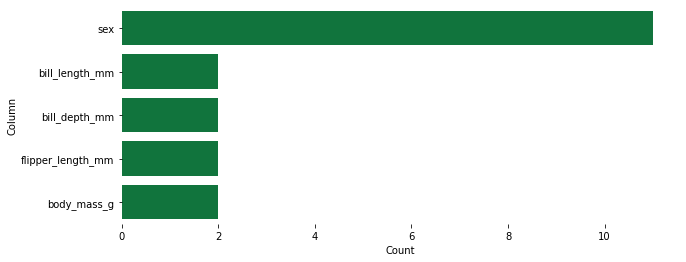

In [6]:
#Cria um gráfico a partir da columa missing_data_columns

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=missing_data_columns, x='Count', y='Column', color="#00853B")
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df) * 100])
plt.suptitle("Missing data distribuition", ha='left', va='top', x=-.1, fontweight='bold')
plt.show()

In [7]:
#Verifica index dos dados faltantes

for column in missing_data_columns.Column:
    indexes = list(df[df[column].isnull()].index)
    print(f'{column}: {indexes}')

sex: [3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339]
bill_length_mm: [3, 339]
bill_depth_mm: [3, 339]
flipper_length_mm: [3, 339]
body_mass_g: [3, 339]


In [8]:
#Deleta dados do index 3, 339 considerando que essas linhas estão com dados faltantes

df = df.drop(index=[3, 339], axis=0).reset_index(drop=True)

In [9]:
#Insere a moda nos dados faltantes de sexo

df = df.fillna(df.mode().squeeze())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


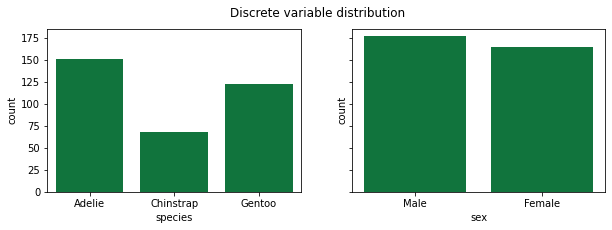

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
fig.suptitle('Discrete variable distribution')
sns.countplot(ax=axes[0], x="species", data=df, color="#00853B")
sns.countplot(ax=axes[1], x="sex", data=df, color="#00853B")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'column'

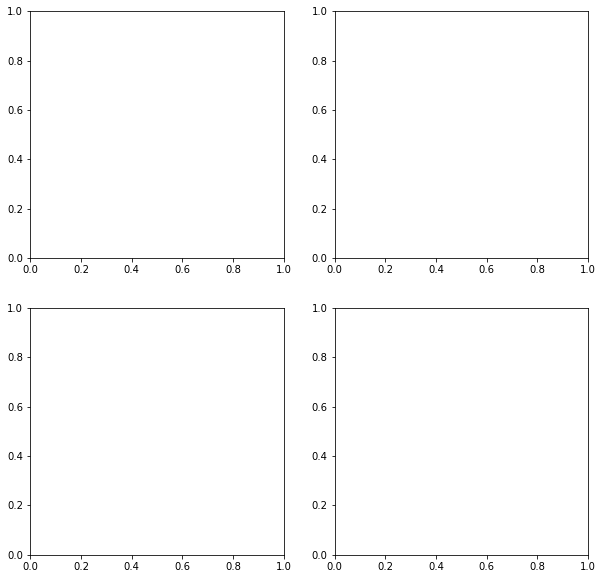

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
float_columns = df.select_dtypes(include=[float]).column
for column, axe in zip(float_columns, fig.axes):
    sns.histplot(ax=axe, data=df, x=column, bins=40, kde=True, color="#00853B")
plt.show()